## Practical Example Using psycopg2 and pandas

In [2]:
import psycopg2
import pandas as pd
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Database connection details
db_username = 'postgres'
db_password = 'mypassword'
db_host = 'leda.geodan.nl'
db_port = '5432'
db_name = 'research'

# 1. Establish the connection using psycopg2
try:
    connection = psycopg2.connect(
        user=db_username,
        password=db_password,
        host=db_host,
        port=db_port,
        database=db_name
    )
    # Set autocommit so that actions like CREATE TABLE aren't in a transaction block
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    print("Connection to PostgreSQL established successfully.")
except Exception as e:
    print("Error connecting to PostgreSQL:", e)


Connection to PostgreSQL established successfully.


In [3]:

# Create a cursor to execute SQL commands
cursor = connection.cursor()

# 2. Create a new table
# Let's create a simple table for demonstration: test_table with id (int) and name (text)
create_table_query = """
CREATE TABLE IF NOT EXISTS amin.test_table (
    id SERIAL PRIMARY KEY,
    name TEXT
);
"""
cursor.execute(create_table_query)
print("Table 'test_table' created (if not exists).")



Table 'test_table' created (if not exists).


In [4]:
# 3. Create a pandas DataFrame in Python
data = {
    'name': ['Building A', 'Building B', 'Building C', 'Building D']
}
df = pd.DataFrame(data)
print("DataFrame created:")
print(df)

DataFrame created:
         name
0  Building A
1  Building B
2  Building C
3  Building D


In [5]:
# 4. Insert the DataFrame into the PostgreSQL table
# We'll do a simple row-by-row insert for demonstration. 
# For large datasets, consider using COPY or other efficient bulk loading methods.
for i, row in df.iterrows():
    insert_query = "INSERT INTO amin.test_table (name) VALUES (%s);"
    cursor.execute(insert_query, (row['name'],))

print("DataFrame rows inserted into 'test_table'.")

# Commit changes if autocommit is not set
# connection.commit()


DataFrame rows inserted into 'test_table'.


In [7]:

# 5. Query the database to select specific things
select_query = "SELECT * FROM amin.test_table WHERE name LIKE 'Building%';"
cursor.execute(select_query)
rows = cursor.fetchall()

print("Selected rows:")
for r in rows:
    print(r)

# Convert selected rows back into a DataFrame
selected_df = pd.DataFrame(rows, columns=['id', 'name'])
print("Converted selected rows into a DataFrame:")
print(selected_df)




Selected rows:
(1, 'Building A')
(2, 'Building B')
(3, 'Building C')
(4, 'Building D')
(5, 'Building A')
(6, 'Building B')
(7, 'Building C')
(8, 'Building D')
Converted selected rows into a DataFrame:
   id        name
0   1  Building A
1   2  Building B
2   3  Building C
3   4  Building D
4   5  Building A
5   6  Building B
6   7  Building C
7   8  Building D


In [9]:
# 6. Drop the table at the end (if desired)
drop_table_query = "DROP TABLE amin.test_table;"
cursor.execute(drop_table_query)
print("Table 'test_table' dropped.")

# Close the cursor and connection
cursor.close()
connection.close()
print("Database connection closed.")

Table 'test_table' dropped.
Database connection closed.


In [12]:
data = {
    'building_name': ['Lighthouse Plaza', 'Historic Cottage', 'Modern Loft', 'Solar Apartment'],
    'building_type': ['Commercial', 'Residential', 'Residential', 'Residential'],
    'construction_year': [1990, 1875, 2015, 2000],
    'energy_label': ['B', 'C', 'A', 'A++'],
    'footprint_area': [350.75, 120.00, 200.50, 310.25],
    # No geometry for now, or could use WKT: 'POLYGON((...))' etc. 
    # Just set None for this demonstration:
    'geom': [None, None, None, None]
}

data

{'building_name': ['Lighthouse Plaza',
  'Historic Cottage',
  'Modern Loft',
  'Solar Apartment'],
 'building_type': ['Commercial', 'Residential', 'Residential', 'Residential'],
 'construction_year': [1990, 1875, 2015, 2000],
 'energy_label': ['B', 'C', 'A', 'A++'],
 'footprint_area': [350.75, 120.0, 200.5, 310.25],
 'geom': [None, None, None, None]}

## Panda

In [15]:
import pandas as pd
import numpy as np
# 1. Creating a Pandas Series
# A Series is like a labeled column of data. If you don’t provide an index, pandas creates one by default.
my_series = pd.Series([10, 20, 15, np.nan, 30], name='values')
print("### Pandas Series ###")
print(my_series)
print()
# We can access statistical information about the Series:
print("### Series Description ###")
print(my_series.describe()) # mean, count, std, etc.
print()
# 2. Creating a Pandas DataFrame
# A DataFrame is like a table, with rows and columns of data.
data = {
 'Name': ['Building A', 'Building B', 'Building C', 'Building D'],
'Year_Built': [1990, 1975, np.nan, 2000],
'Energy_Consumption': [350.7, 420.0, 500.5, np.nan],
'Building_Type': ['Commercial', 'Residential', 'Residential', 'Commercial']
}
df = pd.DataFrame(data)
print("### Original DataFrame ###")
print(df)
print()


### Pandas Series ###
0    10.0
1    20.0
2    15.0
3     NaN
4    30.0
Name: values, dtype: float64

### Series Description ###
count     4.000000
mean     18.750000
std       8.539126
min      10.000000
25%      13.750000
50%      17.500000
75%      22.500000
max      30.000000
Name: values, dtype: float64

### Original DataFrame ###
         Name  Year_Built  Energy_Consumption Building_Type
0  Building A      1990.0               350.7    Commercial
1  Building B      1975.0               420.0   Residential
2  Building C         NaN               500.5   Residential
3  Building D      2000.0                 NaN    Commercial



In [17]:
# 3. Data Cleaning
# Handling missing values: Here, we might decide to fill missing years with a default value (e.g., 1980)
# and drop rows where Energy_Consumption is missing.
df['Year_Built'].fillna(1980, inplace=True)
df = df.dropna(subset=['Energy_Consumption'])  # Drop rows with missing energy consumption
print("### DataFrame After Cleaning ###")
print(df)
print()


### DataFrame After Cleaning ###
         Name  Year_Built  Energy_Consumption Building_Type
0  Building A      1990.0               350.7    Commercial
1  Building B      1975.0               420.0   Residential
2  Building C      1980.0               500.5   Residential



D:\Drives\Temp\ipykernel_18160\3977154983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_Built'].fillna(1980, inplace=True)


In [18]:
# 4. Filtering Rows and Selecting Columns
# Suppose we want only Residential buildings, and we only need 'Name' and 'Energy_Consumption' columns.
filtered_df = df[df['Building_Type'] == 'Residential'][['Name', 'Energy_Consumption']]
print("### Filtered Residential Buildings ###")
print(filtered_df)
print()


### Filtered Residential Buildings ###
         Name  Energy_Consumption
1  Building B               420.0
2  Building C               500.5



In [19]:
# 5. Statistical Operations
# We can compute summary statistics on numeric columns easily.
print("### Summary Statistics of Energy Consumption ###")
print(df['Energy_Consumption'].describe())  # mean, count, min, max, quartiles
print()


### Summary Statistics of Energy Consumption ###
count      3.000000
mean     423.733333
std       74.969749
min      350.700000
25%      385.350000
50%      420.000000
75%      460.250000
max      500.500000
Name: Energy_Consumption, dtype: float64



In [20]:

# 6. Integration with NumPy and Other Libraries
# We can quickly convert columns to NumPy arrays for other analyses if needed.
energy_array = df['Energy_Consumption'].to_numpy()
print("### NumPy Array of Energy Consumption ###")
print(energy_array)
print()

# 7. Grouping and Aggregation
# Let’s say we want to know the average Energy_Consumption by Building_Type.
grouped = df.groupby('Building_Type')['Energy_Consumption'].mean()
print("### Average Energy Consumption by Building Type ###")
print(grouped)
print()

### NumPy Array of Energy Consumption ###
[350.7 420.  500.5]

### Average Energy Consumption by Building Type ###
Building_Type
Commercial     350.70
Residential    460.25
Name: Energy_Consumption, dtype: float64



In [21]:
# 8. Renaming Columns or Applying Functions
# We can rename columns to be more descriptive or apply a function to transform values.
df.rename(columns={'Year_Built': 'Construction_Year'}, inplace=True)
print("### DataFrame with Renamed Column ###")
print(df)
print()

# As you can see, pandas makes it easy to:
# - Load and display tabular data
# - Clean, filter, and reshape the data
# - Compute descriptive statistics and group-level summaries
# - Integrate with NumPy arrays or other libraries for further analysis


### DataFrame with Renamed Column ###
         Name  Construction_Year  Energy_Consumption Building_Type
0  Building A             1990.0               350.7    Commercial
1  Building B             1975.0               420.0   Residential
2  Building C             1980.0               500.5   Residential



In [4]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\new folder (2)\\anaconda\\isabella\\lib\\site-packages\\numpy-1.26.4.dist-info\\METADATA'



In [5]:
pip install shapely pyproj


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\new folder (2)\\anaconda\\isabella\\lib\\site-packages\\numpy-1.26.4.dist-info\\METADATA'



## Geopanda

In [3]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Polygon
import contextily as ctx

# Database connection details
db_username = 'postgres'
db_password = 'mypassword'
db_host = 'leda.geodan.nl'
db_port = '5432'
db_name = 'research'

########################################
# CONNECT TO POSTGRESQL AND CREATE TABLES
########################################
try:
    connection = psycopg2.connect(
        user=db_username,
        password=db_password,
        host=db_host,
        port=db_port,
        database=db_name
    )
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    cursor = connection.cursor()
    print("Connected to PostgreSQL database.")
except Exception as e:
    print("Error connecting to PostgreSQL:", e)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\New folder (2)\Anaconda\Isabella\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\New folder (2)\Anaconda\Isabella\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\New folder (2)\Anaconda\Isabella\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\New folder (2)\Anaconda\Isabella\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [25]:

# Drop old tables if exist
cursor.execute("DROP TABLE IF EXISTS amin.lecture_building_geometries;")
cursor.execute("DROP TABLE IF EXISTS amin.lecture_buildings;")

# Create lecture_buildings table
create_buildings_table = """
CREATE TABLE amin.lecture_buildings (
    building_id SERIAL PRIMARY KEY,
    building_name TEXT NOT NULL,
    building_type TEXT,
    construction_year INT NOT NULL,
    energy_label TEXT,
    CONSTRAINT construction_year_check CHECK (construction_year > 1850)
);
"""
cursor.execute(create_buildings_table)
print("Table amin.lecture_buildings created.")

# Create lecture_building_geometries table with EPSG:28992 (Amersfoort/RD New)
create_geometries_table = """
CREATE TABLE amin.lecture_building_geometries (
    geom_id SERIAL PRIMARY KEY,
    building_id INT NOT NULL,
    geom geometry(Polygon, 28992) NOT NULL,
    CONSTRAINT fk_building
        FOREIGN KEY (building_id)
        REFERENCES amin.lecture_buildings (building_id)
        ON DELETE CASCADE
);
"""
cursor.execute(create_geometries_table)
print("Table amin.lecture_building_geometries created.")

cursor.execute("CREATE INDEX lecture_geom_idx ON amin.lecture_building_geometries USING GIST (geom);")
print("Spatial index on geom created.")

cursor.execute("CREATE INDEX lecture_building_type_idx ON amin.lecture_buildings (building_type);")
print("Index on building_type created.")

InterfaceError: cursor already closed

In [23]:
########################################
# INSERT DATA WITH MORE REALISTIC SHAPES
########################################

buildings_attributes = [
    ('Central Office', 'Office', 1978, 'C'),
    ('Green Villa', 'Residential', 1920, 'D'),
    ('Industrial Shed', 'Industrial', 2005, 'B'),
    ('Eco Apartments', 'Residential', 2015, 'A'),
    ('Historic Manor', 'Residential', 1890, 'C'),
    ('Tech Startup HQ', 'Office', 2010, 'A++')
]

insert_query = """
INSERT INTO amin.lecture_buildings (building_name, building_type, construction_year, energy_label)
VALUES (%s, %s, %s, %s)
RETURNING building_id;
"""

building_ids = []
for b in buildings_attributes:
    cursor.execute(insert_query, b)
    building_ids.append(cursor.fetchone()[0])

print("Inserted building attributes:", building_ids)

def polygon_from_coords(coords):
    if coords[0] != coords[-1]:
        coords = coords + [coords[0]]
    return f"POLYGON(({', '.join([f'{x} {y}' for x,y in coords])}))"

building_geoms = [
    (building_ids[0], polygon_from_coords([(155000, 463000), (155020, 463000), (155020, 463010), (155000, 463010)])),
    (building_ids[1], polygon_from_coords([(155100,463050), (155120,463050), (155120,463060), (155110,463060),(155110,463070),(155100,463070)])),
    (building_ids[2], polygon_from_coords([(154980, 462980), (155030, 462980), (155030, 463010), (154980, 463010)])),
    (building_ids[3], polygon_from_coords([(155200,463100),(155230,463100),(155230,463120),(155220,463120),(155220,463110),(155210,463110),(155210,463120),(155200,463120)])),
    (building_ids[4], polygon_from_coords([(155050,463200),(155060,463200),(155060,463210),(155055,463212),(155050,463210)])),
    (building_ids[5], polygon_from_coords([(155300,463000),(155320,463005),(155320,463020),(155300,463025)]))
]

geom_insert_query = """
INSERT INTO amin.lecture_building_geometries (building_id, geom)
VALUES (%s, ST_GeomFromText(%s, 28992))
RETURNING geom_id;
"""

for b_id, wkt_polygon in building_geoms:
    cursor.execute(geom_insert_query, (b_id, wkt_polygon))

print("Inserted building geometries.")

# District polygon WKT
district_polygon_wkt = polygon_from_coords([
    (154990, 462990), (155250, 462990), (155250, 463150), (154990, 463150)
])

cursor.close()
connection.close()
print("Closed psycopg2 connection.")

InterfaceError: cursor already closed

In [20]:
########################################
# INTEGRATION WITH PANDAS & GEOPANDAS
########################################
connection_string = f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

buildings_df = pd.read_sql("SELECT building_id, building_name, building_type, construction_year, energy_label FROM amin.lecture_buildings;", engine)
geometries_gdf = gpd.read_postgis("SELECT geom_id, building_id, geom FROM amin.lecture_building_geometries;", con=engine, geom_col='geom')

combined_gdf = geometries_gdf.merge(buildings_df, on='building_id')
print("Combined GeoDataFrame:")
print(combined_gdf, "\n")
print("CRS of combined_gdf:", combined_gdf.crs)

Combined GeoDataFrame:
   geom_id  building_id                                               geom  \
0        1            1  POLYGON ((155000.000 463000.000, 155020.000 46...   
1        2            2  POLYGON ((155100.000 463050.000, 155120.000 46...   
2        3            3  POLYGON ((154980.000 462980.000, 155030.000 46...   
3        4            4  POLYGON ((155200.000 463100.000, 155230.000 46...   
4        5            5  POLYGON ((155050.000 463200.000, 155060.000 46...   
5        6            6  POLYGON ((155300.000 463000.000, 155320.000 46...   

     building_name building_type  construction_year energy_label  
0   Central Office        Office               1978            C  
1      Green Villa   Residential               1920            D  
2  Industrial Shed    Industrial               2005            B  
3   Eco Apartments   Residential               2015            A  
4   Historic Manor   Residential               1890            C  
5  Tech Startup HQ        Of

In [22]:
year_stats = combined_gdf.groupby('building_type')['construction_year'].agg(['min', 'max', 'mean'])
print("Construction Year Stats by Building Type:")
print(year_stats, "\n")

modern_buildings = combined_gdf[combined_gdf['construction_year'] > 2000]
print("Modern buildings (constructed after 2000):")
print(modern_buildings[['building_name', 'energy_label']], "\n")


Construction Year Stats by Building Type:
                min   max         mean
building_type                         
Industrial     2005  2005  2005.000000
Office         1978  2010  1994.000000
Residential    1890  2015  1941.666667 

Modern buildings (constructed after 2000):
     building_name energy_label
2  Industrial Shed            B
3   Eco Apartments            A
5  Tech Startup HQ          A++ 



In [23]:

# Spatial check: which buildings are inside district polygon?
district_poly = shapely.wkt.loads(district_polygon_wkt)
within_district = combined_gdf[combined_gdf.within(district_poly)]
print("Buildings within the district polygon:")
print(within_district[['building_name', 'building_type', 'construction_year', 'energy_label']], "\n")

Buildings within the district polygon:
    building_name building_type  construction_year energy_label
0  Central Office        Office               1978            C
1     Green Villa   Residential               1920            D
3  Eco Apartments   Residential               2015            A 



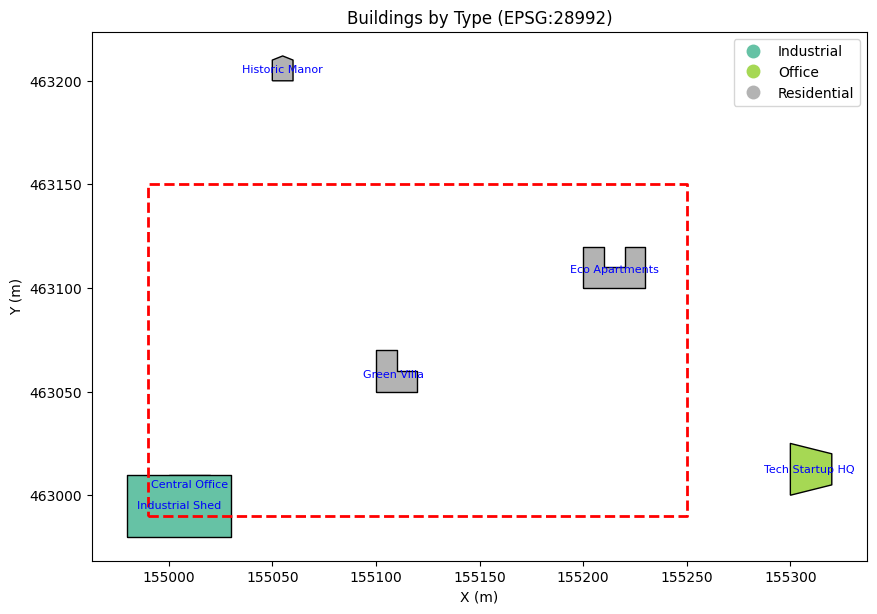

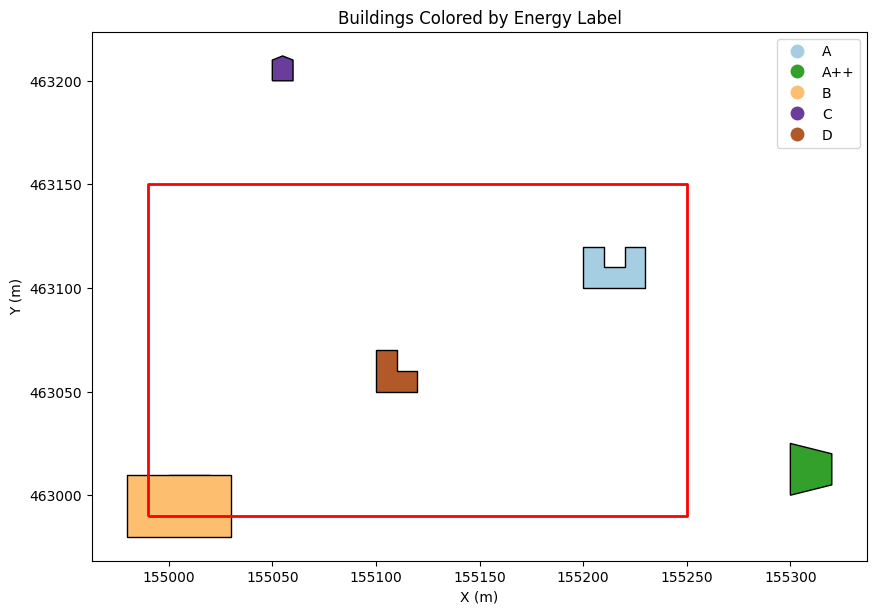

D:\Drives\Temp\ipykernel_54488\196085736.py:39: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
D:\Drives\Temp\ipykernel_54488\196085736.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


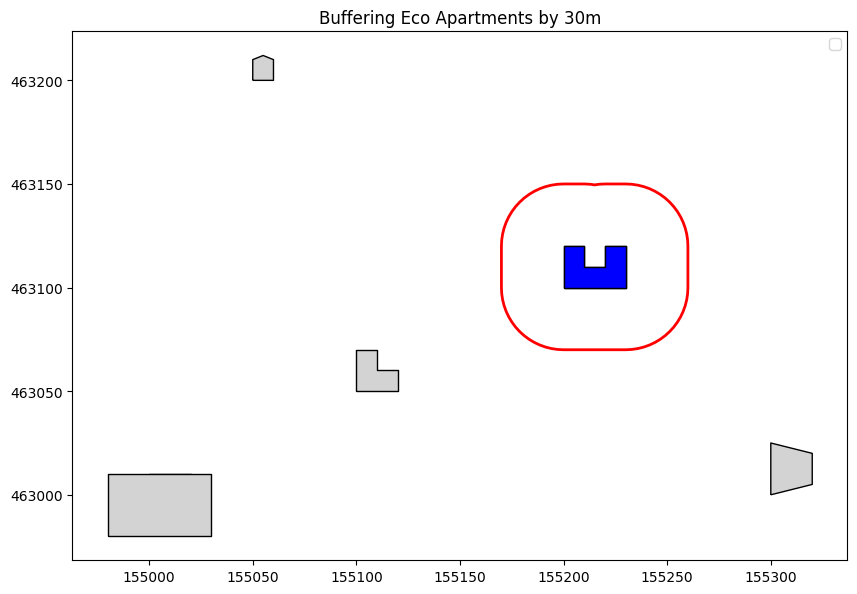

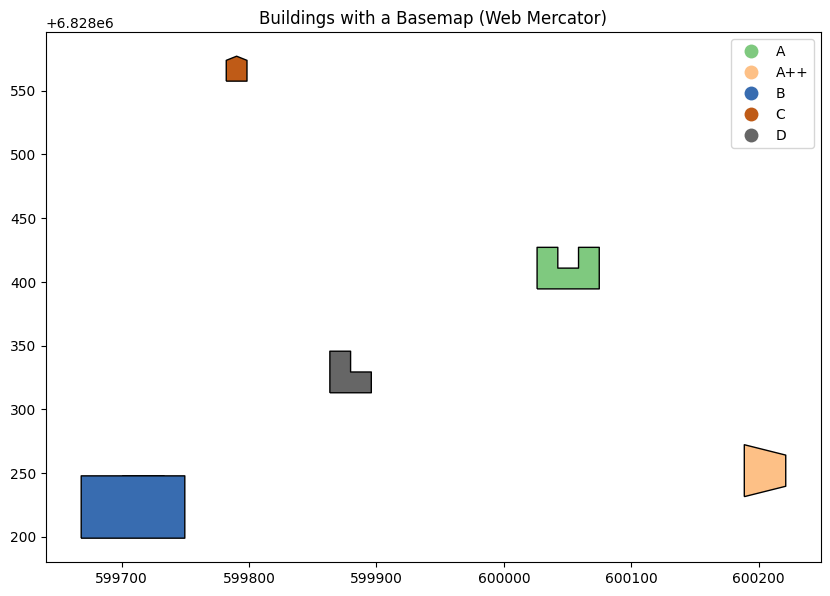

In [24]:


########################################
# VISUALIZATION ENHANCEMENTS
########################################

# Plot buildings by type
fig, ax = plt.subplots(figsize=(10,8))
combined_gdf.plot(column='building_type', legend=True, cmap='Set2', edgecolor='black', ax=ax)
ax.set_title("Buildings by Type (EPSG:28992)")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")

district_gdf = gpd.GeoDataFrame(geometry=[district_poly], crs="EPSG:28992")
district_gdf.boundary.plot(ax=ax, color='red', linewidth=2, linestyle='--')

combined_gdf['centroid'] = combined_gdf.geometry.centroid
for idx, row in combined_gdf.iterrows():
    ax.text(row.centroid.x, row.centroid.y, row['building_name'], fontsize=8, ha='center', va='center', color='blue')

plt.show()

# Thematic map by energy_label
fig, ax = plt.subplots(figsize=(10,8))
combined_gdf.plot(column='energy_label', legend=True, cmap='Paired', edgecolor='black', ax=ax)
ax.set_title("Buildings Colored by Energy Label")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
district_gdf.boundary.plot(ax=ax, color='red', linewidth=2)
plt.show()

# Buffer Eco Apartments by 30m
eco_apartments = combined_gdf[combined_gdf['building_name'] == 'Eco Apartments']
eco_buffer = eco_apartments.buffer(30)

fig, ax = plt.subplots(figsize=(10,8))
combined_gdf.plot(ax=ax, color='lightgray', edgecolor='black')
eco_apartments.plot(ax=ax, color='blue', edgecolor='black', label='Eco Apartments')
gpd.GeoDataFrame(geometry=eco_buffer, crs=combined_gdf.crs).plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='30m Buffer')
ax.set_title("Buffering Eco Apartments by 30m")
ax.legend()
plt.show()

# Add a basemap using contextily
web_merc_gdf = combined_gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10,8))
web_merc_gdf.plot(column='energy_label', cmap='Accent', edgecolor='black', legend=True, ax=ax)
ax.set_title("Buildings with a Basemap (Web Mercator)")

# Use a different known working provider
# You can list available providers using `ctx.providers.keys()`.
# Let's use CartoDB Positron as an example:
#ctx.add_basemap(ax, crs=web_merc_gdf.crs, source=ctx.providers.CartoDB.Positron)

# Label them in Web Mercator
#for idx, row in web_merc_gdf.iterrows():
#    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['building_name'], fontsize=8, ha='center', va='center', color='white')

plt.show()



D:\Drives\Temp\ipykernel_54488\3912887366.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


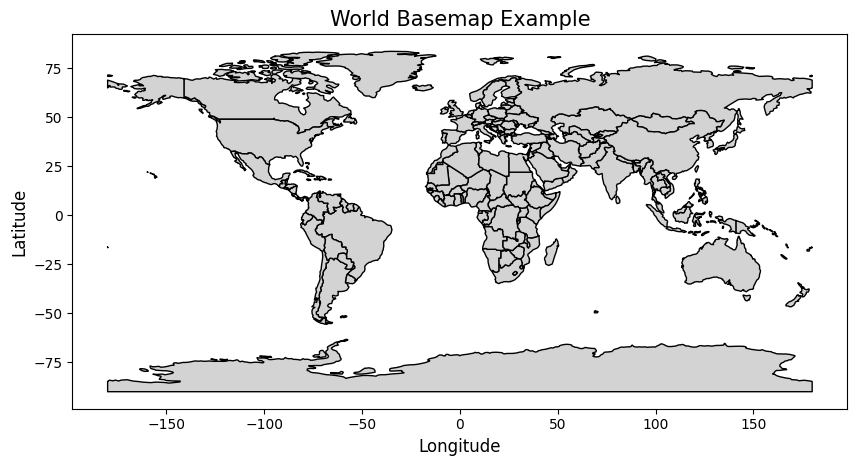

In [25]:
# ver 01.01
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a GeoPandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the geometries
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Customize the basemap
ax.set_title("World Basemap Example", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Display the map
plt.show()
